##Cost and Insurance Analysis of Patient Visit Demo Dataset Part I

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_visit = pd.read_csv("./csv/demo_hospital_outpatient_data_clean.zip")
df_visit.head()

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consulation_minutes,Pharmacy_minutes
0,2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112
1,2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36
2,2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36
3,2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92
4,2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104


In [16]:
avg_cost_by_gender = df_visit.groupby('Gender')['Total_Cost'].mean()
avg_cost_by_gender

Gender
Female    2627.048550
Male      2625.128996
Name: Total_Cost, dtype: float64

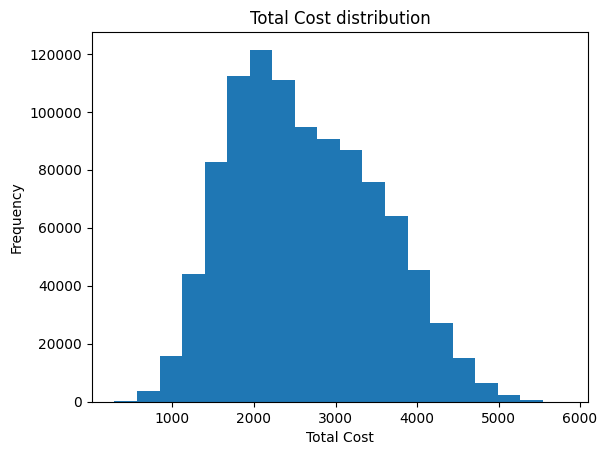

In [17]:
plt.hist(df_visit['Total_Cost'], bins=20)
plt.title('Total Cost distribution')
plt.xlabel('Total Cost')
plt.ylabel("Frequency")
plt.show()

In [18]:
avg_cost_by_insurance = df_visit[df_visit['Has_Insurance'] == True]['Total_Cost'].mean()
avg_cost_by_insurance

1875.4243560527416

In [19]:
avg_cost_without_insurance = df_visit[df_visit['Has_Insurance'] == False]['Total_Cost'].mean()
avg_cost_without_insurance

3126.0332134366477

In [20]:
df_visit['Visit_Date'] = pd.to_datetime(df_visit['Visit_Date'])
df_visit.set_index("Visit_Date", inplace=True)
annual_total_cost = df_visit['Total_Cost'].resample("Y").sum()

/var/folders/k4/z6f6ppnd4b58v5z7g8jltqdh0000gn/T/ipykernel_13951/1129333048.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_total_cost = df_visit['Total_Cost'].resample("Y").sum()


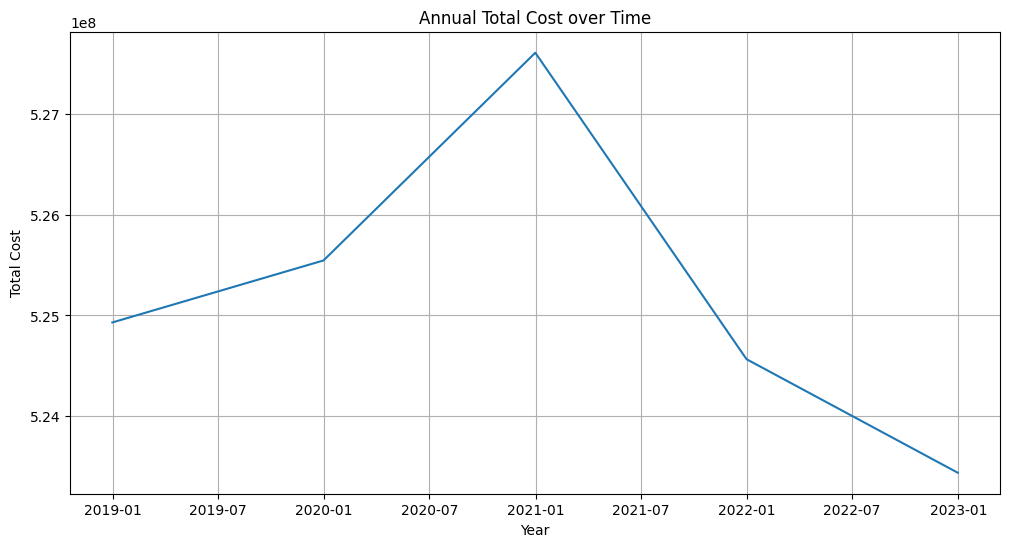

In [21]:
plt.figure(figsize=(12,6))
plt.plot(annual_total_cost.index, annual_total_cost.values)
plt.title("Annual Total Cost over Time")
plt.xlabel("Year")
plt.ylabel("Total Cost")
plt.grid(True)
plt.show()

##Cost and Insurance Analysis of Patient Visit Demo Dataset Part II

In [22]:
df_visit = df_visit.reset_index()

In [23]:
df_visit.set_index('Visit_Date', inplace=True)
df_visit.head()

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consulation_minutes,Pharmacy_minutes
Visit_Date,,,,,,,,,,,,
2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112
2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36
2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36
2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92
2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104


In [24]:
has_insurance_true_data = df_visit[df_visit['Has_Insurance'] == True]['Total_Cost'].resample('Y').sum()
has_insurance_false_data = df_visit[df_visit['Has_Insurance'] == False]['Total_Cost'].resample('Y').sum()

/var/folders/k4/z6f6ppnd4b58v5z7g8jltqdh0000gn/T/ipykernel_13951/2819528301.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  has_insurance_true_data = df_visit[df_visit['Has_Insurance'] == True]['Total_Cost'].resample('Y').sum()
/var/folders/k4/z6f6ppnd4b58v5z7g8jltqdh0000gn/T/ipykernel_13951/2819528301.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  has_insurance_false_data = df_visit[df_visit['Has_Insurance'] == False]['Total_Cost'].resample('Y').sum()


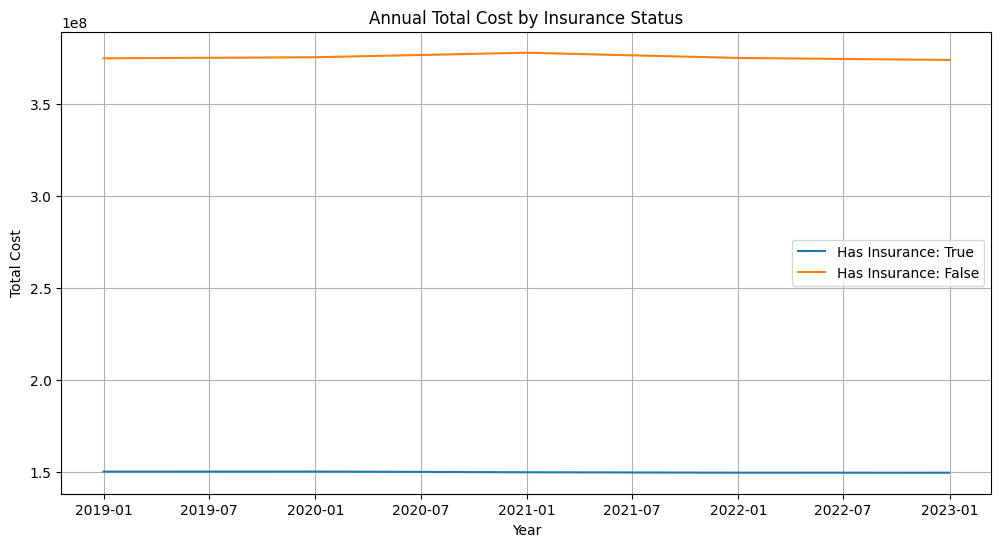

In [25]:
plt.figure(figsize=(12,6))
plt.plot(has_insurance_true_data.index, has_insurance_true_data.values,label='Has Insurance: True')
plt.plot(has_insurance_false_data.index, has_insurance_false_data.values,label='Has Insurance: False')
plt.title('Annual Total Cost by Insurance Status')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.grid(True)
plt.legend()
plt.show()